In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from sklearn.model_selection import train_test_split

In [3]:
from keras.models import Sequential

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [4]:
from keras.layers import Dense,Activation

In [5]:
from keras import optimizers

In [12]:
data = pd.read_csv("diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [19]:
data.columns= ['pregnancy','glucose','bp','skin','insulin','bmi','pedigree','age','class']
x=data.iloc[:,0:8] 
y=data['class']

In [20]:
np.random_seed=999
[x_train,x_test,y_train,y_test] = train_test_split(x,y,test_size = 0.3, random_state = 999)

In [27]:
#Define the architecture

model = Sequential()
model.add(Dense(4,activation='relu',input_dim=8)) #Input layer

In [28]:
model.add(Dense(6,activation='relu')) #Hidden layer
model.add(Dense(1,activation='sigmoid')) #Linear Regression Output layer

In [29]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 4)                 36        
_________________________________________________________________
dense_6 (Dense)              (None, 6)                 30        
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 7         
Total params: 73
Trainable params: 73
Non-trainable params: 0
_________________________________________________________________


In [30]:
#compile the model
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [37]:
#train the model

model_diag = model.fit(x_train,y_train,batch_size=10,epochs=100,verbose=1)

Epoch 1/100
537/537 [==============================] - 0s 96us/step - loss: 0.4887 - acc: 0.7505
Epoch 2/100
537/537 [==============================] - 0s 97us/step - loss: 0.4705 - acc: 0.7616
Epoch 3/100
537/537 [==============================] - 0s 106us/step - loss: 0.4691 - acc: 0.7579
Epoch 4/100
537/537 [==============================] - 0s 82us/step - loss: 0.4748 - acc: 0.7598
Epoch 5/100
537/537 [==============================] - 0s 90us/step - loss: 0.4765 - acc: 0.7616
Epoch 6/100
537/537 [==============================] - 0s 91us/step - loss: 0.4659 - acc: 0.7914
Epoch 7/100
537/537 [==============================] - 0s 80us/step - loss: 0.4688 - acc: 0.7691
Epoch 8/100
537/537 [==============================] - 0s 93us/step - loss: 0.4644 - acc: 0.7728
Epoch 9/100
537/537 [==============================] - 0s 95us/step - loss: 0.4673 - acc: 0.7654
Epoch 10/100
537/537 [==============================] - 0s 93us/step - loss: 0.4701 - acc: 0.7635
Epoch 11/100
537/537 [======

537/537 [==============================] - 0s 112us/step - loss: 0.4675 - acc: 0.7728
Epoch 85/100
537/537 [==============================] - 0s 119us/step - loss: 0.4658 - acc: 0.7821
Epoch 86/100
537/537 [==============================] - 0s 104us/step - loss: 0.4640 - acc: 0.7635
Epoch 87/100
537/537 [==============================] - 0s 91us/step - loss: 0.4605 - acc: 0.7765
Epoch 88/100
537/537 [==============================] - 0s 80us/step - loss: 0.4584 - acc: 0.7821
Epoch 89/100
537/537 [==============================] - 0s 76us/step - loss: 0.4651 - acc: 0.7672
Epoch 90/100
537/537 [==============================] - 0s 88us/step - loss: 0.4599 - acc: 0.7821
Epoch 91/100
537/537 [==============================] - 0s 78us/step - loss: 0.4598 - acc: 0.7747
Epoch 92/100
537/537 [==============================] - 0s 80us/step - loss: 0.4757 - acc: 0.7635
Epoch 93/100
537/537 [==============================] - 0s 80us/step - loss: 0.4795 - acc: 0.7691
Epoch 94/100
537/537 [========

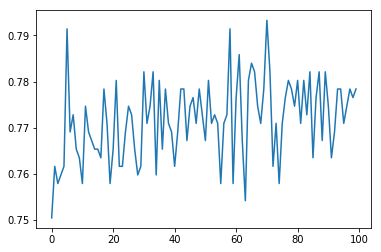

In [39]:
model_epoc_values = model_diag.history['acc']
plt.plot(model_epoc_values)
keys = model_diag.history.keys()
plt.show()

In [48]:
keys

dict_keys(['val_loss', 'val_mean_squared_error', 'loss', 'mean_squared_error'])

In [40]:
#make predictions

model.predict(x_test,batch_size=32)

array([[8.28281343e-02],
       [4.17996496e-01],
       [4.85603213e-02],
       [5.75087965e-01],
       [2.34935820e-01],
       [7.80084729e-01],
       [0.00000000e+00],
       [2.47654378e-01],
       [2.02287942e-01],
       [5.49420118e-02],
       [7.77013659e-01],
       [4.49640781e-01],
       [7.00809956e-01],
       [1.32937253e-01],
       [5.03651440e-01],
       [4.00858521e-02],
       [2.83489525e-01],
       [6.96514070e-01],
       [3.57739031e-01],
       [7.70302773e-01],
       [4.96847063e-01],
       [3.53414595e-01],
       [8.05948853e-01],
       [5.26564956e-01],
       [7.77096272e-01],
       [2.73159742e-02],
       [4.78854656e-01],
       [1.48987770e-01],
       [8.53481054e-01],
       [9.24221456e-01],
       [7.55921304e-02],
       [1.97824329e-01],
       [4.28734720e-02],
       [3.89272064e-01],
       [1.93431795e-01],
       [5.07476628e-01],
       [6.09001815e-01],
       [2.58940160e-01],
       [1.05285943e-01],
       [3.38186473e-01],


In [43]:
def fn_differences(actual,predicted):
    error = actual - predicted
    abs_error = abs(error)
    percent_error =error/actual
    
    mean_abs_error = np.mean(abs_error)
    mean_abs_percent_error = np.mean(percent_error)
    
    return mean_abs_percent_error

In [44]:
#Check the model performance
predict_y_train = model.predict(x_train)

In [47]:
from keras.wrappers.scikit_learn import KerasRegressor

In [63]:
def fn_def_model():
    no_of_hidden_layers = 1
    model1 = Sequential()
    model1.add(Dense(4,activation='relu',input_dim=1)) #Input layer
    for i in range(no_of_hidden_layers):
        model1.add(Dense(6,activation='relu')) #Hidden layer
    model1.add(Dense(1,activation='linear',input_dim=1)) #Linear Regression Output layer
    #compile the model
    model1.compile(loss='mse',optimizer='RMSProp',metrics=['mse'])
    return model1

In [ ]:
estimator = KerasRegressor(build_fn=fn_def_model,epochs=200,)

In [64]:
from sklearn.model_selection import cross_val_score

In [65]:
from sklearn.model_selection import KFold

In [ ]:
kfolds = KFold(n_splits=10,random_state=999)
Results = cross_val_score(estimator,x_train,y_train,cv=kfolds)
Results.mean()
Results.std()